# 🐐 Tennis GOAT Analysis 
>Ce notebook contient l'analyse du GOAT du tennis sur 3 facteurs que j'ai determiné et pondéré.
>1. Victoire en Grand Chelem 0.5
>2. Victoire en Masters 1000 0.3
>3. Taux de Victoire 0.2

🎯 **Objectif : savoir qui est le GOAT du tennis en général et sur chaque surface**

# Import des Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#import warnings
#warnings.filterwarnings("ignore")  

# Chargement du fichier clean

In [3]:
df = pd.read_csv(r"C:\Users\jackd\Downloads\Portfolio Data Analyst\Python\Tennis\all_matches_clean.csv")
df['tourney_date'] = pd.to_datetime(df['tourney_date'])

# Analyse du GOAT

In [4]:
# Filtré sur les finales
finals = df[df['round'] == 'F']

In [5]:
# Titre de GC
gs_titles = finals[finals['tourney_level'] == 'G']['winner_name'].value_counts().rename('gs_titles')

In [6]:
# Titre de Masters 1000
m1000_titles = finals[finals['tourney_level'] == 'M']['winner_name'].value_counts().rename('m1000_titles')

In [7]:
# Taux de victoire = victoires / (victoires + défaites)
wins = df['winner_name'].value_counts()
losses = df['loser_name'].value_counts()
win_rate = (wins / (wins + losses)).rename('win_rate')

In [8]:
# Fusion df
goat_df = pd.concat([gs_titles, m1000_titles, win_rate], axis=1).fillna(0)

In [9]:
# Normalisation et calcul du score pour les joueurs
scaler = MinMaxScaler()
cols = ['gs_titles', 'm1000_titles', 'win_rate']
goat_df[cols] = scaler.fit_transform(goat_df[cols])

goat_df['goat_score'] = (
    goat_df['gs_titles'] * 0.5 +
    goat_df['m1000_titles'] * 0.3 +
    goat_df['win_rate'] * 0.2
)

goat_df = goat_df.sort_values('goat_score', ascending=False)


🏆 TOP 10 GOAT Score:
                gs_titles  m1000_titles  win_rate  goat_score
Novak Djokovic   1.000000         1.000  0.908839    0.981768
Rafael Nadal     0.916667         0.900  0.893463    0.907026
Roger Federer    0.833333         0.700  0.888108    0.804288
Pete Sampras     0.583333         0.275  0.836727    0.541512
Ivan Lendl       0.333333         0.400  0.890454    0.464757
Andre Agassi     0.333333         0.425  0.829877    0.460142
Bjorn Borg       0.458333         0.125  0.894188    0.445504
Rod Laver        0.458333         0.050  0.870604    0.418287
Roy Emerson      0.500000         0.000  0.753090    0.400618
John McEnroe     0.291667         0.150  0.889186    0.368671


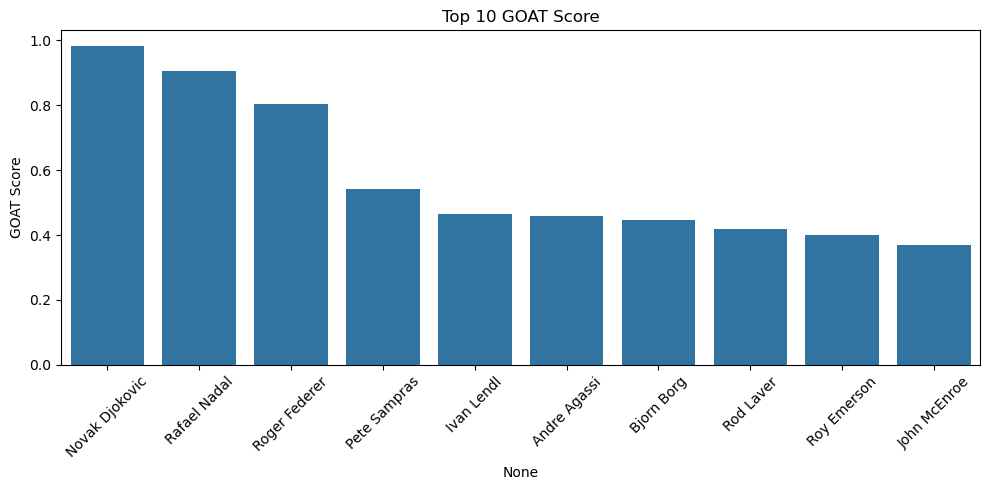

In [10]:
# Affichage du top 10
print("\n🏆 TOP 10 GOAT Score:")
print(goat_df[['gs_titles', 'm1000_titles', 'win_rate', 'goat_score']].head(10))

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=goat_df.head(10).index, y=goat_df['goat_score'].head(10))
plt.title("Top 10 GOAT Score")
plt.ylabel("GOAT Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🥇 Novak Djokovic est statistiquement le joueur le plus complet de l’histoire du tennis :

# 🥈 Rafael Nadal suit de très près, grâce à son palmarès exceptionnel, notamment en Grand Chelem, mais légèrement en retrait en Masters 1000 et win rate.

# 🥉 Roger Federer complète le podium avec un palmarès équilibré, mais une légère baisse sur les Masters 1000 et win rate face à Djokovic.

# Qui est le roi de chaque surface?

In [11]:
surface_titles = {}
for surface in ['clay', 'grass', 'hard']:
    surface_df = finals[finals['surface'] == surface]['winner_name'].value_counts().rename(f'{surface}_titles')
    surface_titles[surface] = surface_df

surface_df = pd.concat(surface_titles.values(), axis=1).fillna(0)

print("\n👑 Top 3 par surface:")
for surface in ['clay', 'grass', 'hard']:
    print(f"\n🏅 {surface.upper()}:")
    print(surface_df.sort_values(f'{surface}_titles', ascending=False)[[f'{surface}_titles']].head(3))


👑 Top 3 par surface:

🏅 CLAY:
                 clay_titles
Rafael Nadal            69.0
Guillermo Vilas         49.0
Thomas Muster           45.0

🏅 GRASS:
               grass_titles
Roger Federer          19.0
Rod Laver              13.0
Pete Sampras           10.0

🏅 HARD:
                hard_titles
Roger Federer          72.0
Novak Djokovic         72.0
Andre Agassi           47.0


# Terre battue (clay) :
- 🥇 Rafael Nadal est incontestablement le roi avec 69 titres, très loin devant ses poursuivants.

# Gazon (grass) :
- 🥇 Roger Federer domine avec 19 titres, reflet de sa suprématie à Wimbledon et dans les tournois pré-Wimbledon.

# Dur (hard) :
- 🥇 Roger Federer et Novak Djokovic sont à égalité parfaite avec 72 titres chacun, confirmant leur régularité sur cette surface rapide et omniprésente sur le circuit.